#### Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

#### Reading the data

In [2]:
## Reading the 2 csv files
companies = pd.read_csv('companies.csv', encoding='ISO-8859-15')
rounds2 = pd.read_csv('rounds2.csv', encoding='ISO-8859-15')

#### Check the datatype and shape of each column in companies

In [3]:
## Check the datatype and shape
print(companies.dtypes)
print(companies.shape) # (66368, 10)

permalink        object
name             object
homepage_url     object
category_list    object
status           object
country_code     object
state_code       object
region           object
city             object
founded_at       object
dtype: object
(66368, 10)


#### All the columns are of object datatype and there are 66368 rows with 10 columns

#### Let's see some records

In [4]:
companies.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/ÃAsys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/Organization/Ä°Novatiff-Reklam-Ve-Tanä±Tä±M-H...,Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


#### We see that there are some unknown characters present in the data, we need to handle those
- To do this, we will first encode the __permalink__ to ISO and then decode it to ascii 
- Then we will encode the __name__ to ISO and then decode it to ascii 

In [5]:
## Handle unknown characters in the data
companies.permalink = companies.permalink.str.encode('ISO-8859-15').str.decode('ascii','ignore')
companies.name = companies.name.str.encode('ISO-8859-15').str.decode('ascii','ignore')

In [6]:
# Let's check the tail again to see the change
companies.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/Eron,ERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/Asys-2,asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/Organization/Novatiff-Reklam-Ve-TanTM-Hizmetl...,novatiff Reklam ve Tantm Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


#### The column __permalink__ is now looking promising, but the casing of the data is not uniform, we need to convert the column __permalink__ to lower for better comparison


In [7]:
# Converting to lower for better comparison
companies.permalink = companies.permalink.str.lower()

#### Let's now check the datatype and shape for the rounds2 table

In [8]:
## Check the datatype and shape
print(rounds2.dtypes)
print(rounds2.shape) # (114949, 6)

company_permalink           object
funding_round_permalink     object
funding_round_type          object
funding_round_code          object
funded_at                   object
raised_amount_usd          float64
dtype: object
(114949, 6)


#### All the columns except one are of object datatype and there are 66368 rows with 10 columns

In [9]:
## Let's check the rounds2 dateset as well
rounds2.tail()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ÃASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0
114948,/organization/ä°novatiff-reklam-ve-tanä±tä±m-h...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0


#### We see that there are some unknown characters present in the data, we need to handle those,
- To do this, we will first encode the __company_permalink__ to ISO and then decode it to ascii 

In [10]:
## Handle unknown characters in the data
rounds2.company_permalink = rounds2.company_permalink.str.encode('ISO-8859-15').str.decode('ascii','ignore')

In [11]:
# Let's check the tail again to see the change
rounds2.tail()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0
114948,/organization/novatiff-reklam-ve-tantm-hizmetl...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0


#### Now the column __company_permalink"__ is looking good, but there are names with capital letters in the __company_permalink"__ column , we need to convert them to all lowers for better representation

In [12]:
# Converting to lower for better comparison
rounds2.company_permalink = rounds2.company_permalink .str.lower()

#### Let's get the answers based on the questions

### __Checkpoint 1: Data Cleaning 1__

#### Q1: Unique companies present in __rounds2__

In [13]:
## Filter the dataset for unique values and find its length
len(rounds2.company_permalink.str.lower().unique())

66368

#### A1: There are 66368 unique companies in __rounds2__

#### Q2: Unique companies present in __companies__

In [14]:
## Filter the dataset for unique values and find its length
len(companies.permalink.str.lower().unique())

66368

#### A2: There are 66368 unique companies in __companies__ t00, same as unique values in __rounds2__

#### Q3: In the __companies__ data frame, which column can be used as the unique key for each company? Write the __name of the column__.

#### A3: The column __permalink__ can be used as the unique key, as it is present in both the datasets

#### Q4: Are there any __companies__ in the __rounds2__ file which are not present in __companies__? Answer yes or no: __Y/N__

#### A4: To check this we can compare the unique values from both the tables and compare those, if they come equal, we can say that all the values are common in both the tables

In [15]:
temp = rounds2.company_permalink.str.lower().unique() == companies.permalink.str.lower().unique()

In [16]:
all(temp) ## all returns True if all elements of the iterable are considered as true values 

True

- That means all the values are common in both the tables

#### A4: So the answer is N

#### Q5: Merge the two data frames so that all variables (columns) in the __companies__ frame are added to the __rounds2__ data frame. Name the merged frame __master_frame__. How many observations are present in master_frame? 

#### To add all the columns from __companies__ table to the __rounds2__ table, we can merge them using pd.merge function of pandas. 
- We need to add to __rounds2__ table so we will take a left join on rounds2 table

#### Let's check the result of the merge operation, so that we can assign it to a dataframe later after validation

In [17]:
## Merge the two datasets on the basis of permalink column and see top 5 records
pd.merge(rounds2,companies, how = 'left', left_on = 'company_permalink', right_on = 'permalink').head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


#### Let's keep the above result in a dataframe named __master_frame__

In [18]:
## Store the above dataframe in a variable called master_frame
master_frame = pd.merge(rounds2,companies, how = 'left', left_on = 'company_permalink', right_on = 'permalink')

In [19]:
## Find the number of rows
master_frame.shape[0]

114949

#### A5: So, there are __114949__ rows or observations present in the __master_dataframe__

### __Checkpoint 2: Funding Type Analysis__

#### 1. Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity)

#### 2. Based on the most representative investment amount calculated above, which investment type do you think is the most suitable for Spark Funds?

#### Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, which investment type is the most suitable for it? Identify the investment type and, for further analysis, filter the data so it only contains the chosen investment type.

## __Exploring the data__

#### Let's check some records from the __master_frame__ dataset

In [20]:
## Check top 5 records
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


#### Let's check the null values in the __master_frame__ dataset

In [21]:
## Check for number of null values in all the columns
master_frame.isnull().sum().sort_values(ascending = False)

funding_round_code         83809
founded_at                 20521
raised_amount_usd          19990
state_code                 10946
region                     10167
city                       10164
country_code                8678
homepage_url                6134
category_list               3410
name                           1
status                         0
permalink                      0
funded_at                      0
funding_round_type             0
funding_round_permalink        0
company_permalink              0
dtype: int64

#### Out of these columns, __funding_round_code__, __funded_at__, __homepage_url__,  __state_code__, __region__ , __city__ , __homepage_url__ and  __founded_at__ do not seem to be having much impact on data, so we can drop these columns straightforward

In [22]:
## Drop some columns which doesn't have much impact on the data
master_frame = master_frame.drop(['funding_round_code', 'funded_at', 'homepage_url', 'state_code', 'region' , 'city' , 'homepage_url','founded_at'], axis = 1)

#### Let's check the null values in the __master_frame__ dataset again

In [23]:
## Check for null values
master_frame.isnull().sum().sort_values(ascending = False)

raised_amount_usd          19990
country_code                8678
category_list               3410
name                           1
status                         0
permalink                      0
funding_round_type             0
funding_round_permalink        0
company_permalink              0
dtype: int64

#### Let's convert into percentage to get the proportional idea

In [24]:
## Convert the number to percentage
round(100 * master_frame.isnull().sum().sort_values(ascending = False)/len(master_frame.index),2)

raised_amount_usd          17.39
country_code                7.55
category_list               2.97
name                        0.00
status                      0.00
permalink                   0.00
funding_round_type          0.00
funding_round_permalink     0.00
company_permalink           0.00
dtype: float64

#### As we have to analyse the investment amount, we can drop the null values in this column as we can not guess the investment amount, nor can we impute by mean or median

In [25]:
master_frame = master_frame[~(master_frame.raised_amount_usd.isnull())]

#### Next is the country code, we can drop the null values in this column as well

In [26]:
master_frame = master_frame[~(master_frame.country_code.isnull())]

#### Next in the list is the category list, we can drop the null values in this column as well

In [27]:
master_frame = master_frame[~(master_frame.category_list.isnull())]

#### Let's cross check, now there should be no null data

In [28]:
## Check for the null values once again
round(100 * master_frame.isnull().sum().sort_values(ascending = False)/len(master_frame.index),2)

name                       0.0
country_code               0.0
status                     0.0
category_list              0.0
permalink                  0.0
raised_amount_usd          0.0
funding_round_type         0.0
funding_round_permalink    0.0
company_permalink          0.0
dtype: float64

#### Now, the dataframe is clean, let's see the percentage of retained columns, we had __114949__ columns initially

In [29]:
## Check the percentage of data retained
round(100* master_frame.shape[0]/114949,2)

77.02

#### That means, we have retained 77% of the original data

#### Coming back to the questions

#### 1. Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity)

#### Lets filter out the values for the given funding types

In [30]:
## Filter by 4 given funding type
four_funding_types = master_frame[master_frame.funding_round_type.isin(['venture', 'angel', 'seed', 'private_equity'])]

#### Let's create a pivot table for the given funding types and investment amount

In [31]:
## Pivot table for raised_amount_usd vs funding_round_type
pd.pivot_table(four_funding_types, values = 'raised_amount_usd', index = 'funding_round_type')

,raised_amount_usd
funding_round_type,
angel,9.715739e+05
private_equity,7.393849e+07
seed,7.477937e+05
venture,1.172422e+07


#### The values of amount are in USD, let's create a new column with amount in million USD, since all the answers are supposed to be in Million

In [128]:
## Create a new column with value in million USD
master_frame['raised_amount_million_usd'] =  master_frame.raised_amount_usd/1000000

#### Let's create the filter and the  pivot table again, this time with the new column

In [33]:
## Filter the data from master_frame for the given funding types
four_funding_types = master_frame[master_frame.funding_round_type.isin(['venture', 'angel', 'seed', 'private_equity'])]

In [34]:
## Visualize using pivot table
pd.pivot_table(four_funding_types, values = 'raised_amount_million_usd', index = 'funding_round_type')

,raised_amount_million_usd
funding_round_type,
angel,0.971574
private_equity,73.938486
seed,0.747794
venture,11.724223


#### Since the default aggregate function for the pivot table is mean, and we have been asked the most representative value, let's check for the median too and then decide

In [35]:
## Check for both mean and median aggregate functions
pd.pivot_table(four_funding_types, values = 'raised_amount_million_usd', index = 'funding_round_type', aggfunc = ['mean','median'])

,mean,median
,raised_amount_million_usd,raised_amount_million_usd
funding_round_type,,
angel,0.971574,0.414906
private_equity,73.938486,20.000000
seed,0.747794,0.300000
venture,11.724223,5.000000


#### There appears to be considerable difference between the values, may be because of presence of outliers, let's visualize using the seaborn library

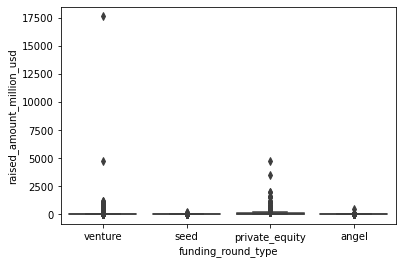

In [36]:
## Visualize the four funding types on a boxplot
sns.boxplot(four_funding_types.loc[:,four_funding_types.columns != 'raised_amount_usd'].funding_round_type,four_funding_types.raised_amount_million_usd)
plt.show()

#### Now we have to decide for the __most representative__ value, let's describe for each column

In [37]:
## Checking for the decription
four_funding_types[four_funding_types.funding_round_type == 'angel'].describe()

,raised_amount_usd,raised_amount_million_usd
count,4.400000e+03,4400.000000
mean,9.715739e+05,0.971574
std,7.710904e+06,7.710904
min,0.000000e+00,0.000000
25%,1.527565e+05,0.152756
50%,4.149060e+05,0.414906
75%,1.000000e+06,1.000000
max,4.945120e+08,494.511992


#### The 75th percentile is 1 and max value is 494.5, the difference is very high. Also, the mean is 0.97 and median is 0.41. The difference is due to the presence of large values like 494.5. In presence of outliers, the better representative is median. So, the most representative aggregate for angel funding is median

#### So, the answer is 0.41M USD for angel funding

In [38]:
## Checking for the decription
four_funding_types[four_funding_types.funding_round_type == 'private_equity'].describe()

,raised_amount_usd,raised_amount_million_usd
count,1.820000e+03,1820.000000
mean,7.393849e+07,73.938486
std,2.017765e+08,201.776467
min,0.000000e+00,0.000000
25%,5.000000e+06,5.000000
50%,2.000000e+07,20.000000
75%,7.576257e+07,75.762572
max,4.745460e+09,4745.460219


#### The 75th percentile is 75.76 and max value is 4745.46, which is a big difference. Also, the mean is 73.94 and median is 20. The difference is due to the presence of large values like 4745. In presence of outliers, the better representative is median. So, the most representative aggregate for private equity funding is median

#### So, the answer is 20M USD for private equity funding

In [39]:
## Checking for the decription
four_funding_types[four_funding_types.funding_round_type == 'seed'].describe()

,raised_amount_usd,raised_amount_million_usd
count,2.109500e+04,21095.000000
mean,7.477937e+05,0.747794
std,2.288318e+06,2.288318
min,0.000000e+00,0.000000
25%,6.881650e+04,0.068817
50%,3.000000e+05,0.300000
75%,1.000000e+06,1.000000
max,2.000000e+08,200.000000


#### The 75th percentile is 1 and max value is 200, which is a big difference. Also, the mean is 0.74 and median is 0.3. The difference is due to the presence of large values like 200. In presence of outliers, the better representative is median. So, the most representative aggregate for seed funding is median

#### So, the answer is 0.30M USD for seed funding

In [40]:
## Checking for the decription
four_funding_types[four_funding_types.funding_round_type == 'venture'].describe()

,raised_amount_usd,raised_amount_million_usd
count,4.780900e+04,47809.000000
mean,1.172422e+07,11.724223
std,8.821571e+07,88.215714
min,0.000000e+00,0.000000
25%,1.600000e+06,1.600000
50%,5.000000e+06,5.000000
75%,1.200000e+07,12.000000
max,1.760000e+10,17600.000000


#### The 75th percentile is 12 and max value is 17600, which is a very big difference. Also, the mean is 11.72 and median is 5. The difference is due to the presence of very large values like 17600. In presence of outliers, the better representative is median. So, the most representative aggregate for seed funding is median

#### So, the answer is 5M USD for venture funding

#### 2. Based on the most representative investment amount calculated above, which investment type do you think is the most suitable for Spark Funds?

In [41]:
## Looking at the pivot table for both mean and median
pd.pivot_table(four_funding_types, values = 'raised_amount_million_usd', index = 'funding_round_type', aggfunc = ['median','mean']) #lambda x: max(x))

,median,mean
,raised_amount_million_usd,raised_amount_million_usd
funding_round_type,,
angel,0.414906,0.971574
private_equity,20.000000,73.938486
seed,0.300000,0.747794
venture,5.000000,11.724223


#### __Answer__: The highest mean and median raised amount is highest for private equity, we can say that private equity is the most suitable investment type for Spark Funds on the basis of most representative amount

#### Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, which investment type is the most suitable for it? Identify the investment type and, for further analysis, filter the data so it only contains the chosen investment type.

#### We have already calculated the values for four funding type, only the venture type had both the mean and median aggergate values betwwen 5 to 15 M USD, at 11.72M USD and 5M USD respectively

In [42]:
## Check the description of venture type, which is most suitable for Spark Funds
four_funding_types[four_funding_types.funding_round_type == 'venture'].describe()

,raised_amount_usd,raised_amount_million_usd
count,4.780900e+04,47809.000000
mean,1.172422e+07,11.724223
std,8.821571e+07,88.215714
min,0.000000e+00,0.000000
25%,1.600000e+06,1.600000
50%,5.000000e+06,5.000000
75%,1.200000e+07,12.000000
max,1.760000e+10,17600.000000


#### We see that in the given range the values for mean and median are 11.72 and 5, both of which are in the range 5 to 15 M USD range ,so the venture investment is most suited in the given range

#### Let's filter out the data on the venture investment type and keep the filtered values in master_frame dataset

In [43]:
## Saving the data in the original dataframe called master_frame
master_frame = four_funding_types[four_funding_types.funding_round_type == 'venture']

#### Let's observe the shape and records for the master_frame dataset

In [44]:
## Check the shape and top 5 records in master_frame
print(master_frame.shape)
master_frame.head()

(47809, 10)


,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,permalink,name,category_list,status,country_code,raised_amount_million_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,/organization/-fame,#fame,Media,operating,IND,10.000000
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,2.000000
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,0.719491
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,20.000000
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,1.700000


### __Checkpoint 3: Country Analysis__

#### 1. Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

#### To calculate the top 9 speaking countries, we will first groupby country code and then calculate the total investment. Finally, we will sort the result in the descending order

In [45]:
## Sorting by the highest amount for all the countries
master_frame.groupby(by='country_code').raised_amount_million_usd.sum().sort_values(ascending = False).head(9)

country_code
USA    420068.029342
CHN     39338.918773
GBR     20072.813004
IND     14261.508718
CAN      9482.217668
FRA      7226.851352
ISR      6854.350477
DEU      6306.921981
JPN      3167.647127
Name: raised_amount_million_usd, dtype: float64

#### Alternatively, we can create a pivot table to do the same

In [46]:
## Sorting by the highest amount for all the countries and assigning the top 9 in a dataframe called top9
top9 = pd.pivot_table(master_frame, values = 'raised_amount_million_usd', index = 'country_code', aggfunc = np.sum).sort_values(by= 'raised_amount_million_usd' ,ascending = False).head(9)#.iloc[:9,]

#### Let's take a look at top9 dataset

In [47]:
## Taking a look at top9
top9

,raised_amount_million_usd
country_code,
USA,420068.029342
CHN,39338.918773
GBR,20072.813004
IND,14261.508718
CAN,9482.217668
FRA,7226.851352
ISR,6854.350477
DEU,6306.921981
JPN,3167.647127


#### Top 3 countries on the basis of raised investment comes out to be USA, CHN and GBR, but since we have to identify the top 3 English speaking coutries, CHN sits out of the list

#### So, the top 3 English speaking countries comes out to be __USA__, __GBR__ and __IND__

#### For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

 

#### __Answer__: The top 3 English speaking countries comes out to be __USA__, __GBR__ and __IND__

### __Checkpoint 4: Sector Analysis 1__

#### Extract the primary sector of each category list from the category_list column

#### Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

#### We already know the venture is the most suited funding type. Now, we also know the top 3 most investment-friendly countries ,so we will filter our table venture_funding_type according to the countries

#### Let's first take a look at top 5 rows of master_frame

In [48]:
## Selecting top 5 records
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,permalink,name,category_list,status,country_code,raised_amount_million_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,/organization/-fame,#fame,Media,operating,IND,10.000000
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,2.000000
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,0.719491
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,20.000000
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,1.700000


#### Now you also know the three most investment-friendly countries and the most suited funding type for Spark Funds. Let us now focus on finding the best sectors in these countries.

In [49]:
## Idetifying the sectors in the top 3 English speaking countries
best_sectors_countries = master_frame[master_frame.country_code.isin(['USA', 'GBR', 'IND'])]

#### Let's take a look at the data for these countries

In [50]:
## Taking a look at the top 5 rows
best_sectors_countries.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,permalink,name,category_list,status,country_code,raised_amount_million_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,/organization/-fame,#fame,Media,operating,IND,10.0
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,20.0
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,1.7
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,8900000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,8.9
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,5000000.0,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,5.0


#### 1. Extract the primary sector of each category list from the category_list column

##### Taking a backup first

In [51]:
## Taking a backup of data
df = best_sectors_countries.copy()

#### For some companies, the category list is a list of multiple sub-sectors separated by a pipe (vertical bar |). For example, one of the companies’ category_list is Application Platforms|Real Time|Social Network Media.

#### Let's apply a filter to fulfil the above criteria

In [52]:
## Identifying the primary sector from the category list
df['category_list'] = df.loc[:,'category_list'].apply(lambda x: x.split('|')[0] if '|' in x else x)

#### Let's take a look at the data now

In [53]:
## Taking a look at top 5 rows
df.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,permalink,name,category_list,status,country_code,raised_amount_million_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,/organization/-fame,#fame,Media,operating,IND,10.0
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,20.0
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,1.7
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,8900000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,8.9
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,5000000.0,/organization/1-mainstream,1 Mainstream,Apps,acquired,USA,5.0


#### Let's convert back to the original name

In [54]:
## Converting to the original name
best_sectors_countries = df.copy()

#### If we compare from the dataset before applying the function, we observe that the category_list is Apps|Cable|Distribution|Software for the fifth row whereas it is Apps only after conversion, so the data is ok now

#### 2. Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

#### Let's read the data from 'mapping.csv' file so that we can do further mapping

In [55]:
## Reading the mapping file
mapping = pd.read_csv('mapping.csv',skiprows= [1])

#### Let's take a look at it

In [56]:
## Looking at top 5 rows
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,3D,0,0,0,0,0,1,0,0,0
1,3D Printing,0,0,0,0,0,1,0,0,0
2,3D Technology,0,0,0,0,0,1,0,0,0
3,Accounting,0,0,0,0,0,0,0,0,1
4,Active Lifestyle,0,0,0,0,1,0,0,0,0


#### Let's check the sum of values in the column blank, as it is not one of the category

In [57]:
## Checking if there is any data in the column names Blanks
mapping.Blanks.sum(axis =0) 

0

##### All values for the column __blank__ are zero, so we can delete the column

In [58]:
## Deleting the Blanks column as it does not hold any useful data
mapping = mapping.drop('Blanks', axis = 1)

#### Let's obseve the columns now and check if the 8 categories are there

In [59]:
## Looking at top 5 records now, we see that the Blanks column is no more
mapping.head()

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,3D,0,0,0,0,1,0,0,0
1,3D Printing,0,0,0,0,1,0,0,0
2,3D Technology,0,0,0,0,1,0,0,0
3,Accounting,0,0,0,0,0,0,0,1
4,Active Lifestyle,0,0,0,1,0,0,0,0


#### Let's explore the mapping column in detail

In [60]:
## Taking a look by creating pivot table
pd.pivot_table(mapping, index = 'category_list')

,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
category_list,,,,,,,,
0notechnology,0,1,0,0,0,0,0,0
0tural Language Processing,0,1,0,0,0,0,0,0
0tural Resources,0,1,0,0,0,0,0,0
0vigation,0,0,0,0,0,1,0,0
3D,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
Young Adults,0,0,0,0,0,0,1,0
iOS,0,0,0,0,0,0,1,0
iPad,0,0,0,0,0,0,1,0


#### Looking at the data , it seems that the value 0notechnology should be nothing but Nanotechnology, looks like all the 'NA' was replaced with 0, we will revert that to improve the quality of data

In [61]:
### Let's check for all the data that contains 0
mapping[mapping.category_list.str.contains('0')]

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
19,Alter0tive Medicine,0,0,0,1,0,0,0,0
21,A0lytics,0,0,0,0,0,0,0,1
58,Big Data A0lytics,0,0,0,0,0,0,0,1
78,Business A0lytics,0,0,0,0,0,0,0,1
88,Can0bis,0,0,0,1,0,0,0,0
90,Career Ma0gement,0,0,0,0,0,0,0,1
102,Chi0 Internet,0,0,0,0,0,1,0,0
113,Cloud Ma0gement,0,0,0,0,0,1,0,0
144,Contact Ma0gement,0,0,0,0,0,0,0,1
197,Digital Rights Ma0gement,0,0,1,0,0,0,0,0


#### There is a value as Enterprise 2.0 at the row index 242, we need to take special care of it

In [62]:
## Taking a copy of the dataframe
map2 = mapping.copy()

In [63]:
## Search for Enterprise 2.0
map2[map2.category_list == 'Enterprise 2.0']

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
242,Enterprise 2.0,0,0,0,0,0,0,1,0


#### There is only one value with Enterprise 2.0, let's handle it

In [64]:
## Apply logic to retain the Enterprise 2.0 row
map2.category_list = map2.category_list.apply(lambda x: x if '0' not in x else ('Enterprise 2.0' if x == 'Enterprise 2.0' else x.replace('0','na')) )

In [65]:
### Let's cross chcek if Enterprise 2.0 is retained
map2[map2.category_list == 'Enterprise 2.0']

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
242,Enterprise 2.0,0,0,0,0,0,0,1,0


#### The data is retained, now let' explore more of the dataset

In [66]:
## Explore the data now
pd.pivot_table(map2, index = 'category_list')

,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
category_list,,,,,,,,
3D,0,0,0,0,1,0,0,0
3D Printing,0,0,0,0,1,0,0,0
3D Technology,0,0,0,0,1,0,0,0
Accounting,0,0,0,0,0,0,0,1
Active Lifestyle,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
mHealth,0,0,0,1,0,0,0,0
nanotechnology,0,1,0,0,0,0,0,0
natural Language Processing,0,1,0,0,0,0,0,0


#### We see that the first character of words like nanotechnology is small, it will create problems in merging, we will make it working using a custom function

In [67]:
## Create a function to handle special cases in the data
def capitalize(ab):
    if ab[0:2] == 'na':
        return ab.title()
    elif ab[1].isupper():
        return ab
    elif ab[0].islower():
        return ab
    else:
        return ab

#### Let's apply the function over the dataset

In [68]:
## Applying the above function on map2 dataframe
map2.category_list = map2.category_list.apply(capitalize)

#### Let's take a look

In [69]:
## Observing the data after applying function
pd.pivot_table(map2, index = 'category_list')

,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
category_list,,,,,,,,
3D,0,0,0,0,1,0,0,0
3D Printing,0,0,0,0,1,0,0,0
3D Technology,0,0,0,0,1,0,0,0
Accounting,0,0,0,0,0,0,0,1
Active Lifestyle,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
Young Adults,0,0,0,0,0,0,1,0
iOS,0,0,0,0,0,0,1,0
iPad,0,0,0,0,0,0,1,0


#### Now the data looks promising, we can do further operations

#### Let's first make the dataset name as mapping again

In [70]:
## Back to original name
mapping = map2.copy()

#### Let's take a look at the top 5 rows

In [71]:
## Top 5 rows of mapping
mapping.head()

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,3D,0,0,0,0,1,0,0,0
1,3D Printing,0,0,0,0,1,0,0,0
2,3D Technology,0,0,0,0,1,0,0,0
3,Accounting,0,0,0,0,0,0,0,1
4,Active Lifestyle,0,0,0,1,0,0,0,0


#### The data is in the form of a 0 and 1 matrix, it can be converted to two columns where one column is the category_list alreadyy and the other column would be the name of the main sector.
#### For this we will make use of melt function that takes the category_list as an argument and the name of all the main sectors as other

In [72]:
## Applying pd.melt with category_list as id_vars and the other columns as value_vars
mapping = pd.melt(mapping, id_vars = ['category_list'], value_vars = mapping.loc[:,'Automotive & Sports':'Social, Finance, Analytics, Advertising'].columns)                

#### Let's chcck the result after conversion

In [73]:
## Check the shape and few records
print(mapping.shape)
mapping.head()

(5496, 3)


,category_list,variable,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0


#### The above table indicates that if the category(column 1) falls under main sector (column 2), the value in the value column(column 3) is 1 otherwise it will be 0.

#### But the values 0 are an overload to the dataset because the original dataset of 687 rows × 8 columns is now converted to 5496 rows * 3 columns, so we will remove all the rows that contains 0 to get rid of redundant information

In [74]:
## Removing the roes with value as 0 , since these do not contain any extra information
mapping = mapping[~(mapping.value == 0)]

#### Let's observe the change again

In [75]:
## Observing the values again
print(mapping.shape)
mapping.head()

(687, 3)


,category_list,variable,value
7,Adventure Travel,Automotive & Sports,1
13,Aerospace,Automotive & Sports,1
44,Auto,Automotive & Sports,1
45,Automated Kiosk,Automotive & Sports,1
46,Automotive,Automotive & Sports,1


#### The data is now back to original shape, and the values are clear indication of relation between category and sector.
#### But the value column is an extra information, since mapping is already contained in the first two columns, we will drop this column

In [76]:
## Dropping the value information since it does not provide any extra information
mapping = mapping.drop('value',axis = 1)

#### Let's also rename the variable column to primary_sector

In [77]:
## Renaming the column to main_sector`
mapping = mapping.rename(columns = {'variable':'main_sector'})

#### Let's check the mapping once again

In [78]:
## Observing the dataset again
mapping.head()

,category_list,main_sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports


#### The dataset is now looking good, we can proceed further

#### 2. Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

### We had kept the dataframe best_sectors_countries containing the top 3 English speaking countries, for the above requirement, we will map this with the newly created mapping dataframe on the basis of __category_list__ column

In [79]:
## Merge with best_sector_countries dataset
best_sectors_countries = best_sectors_countries.merge(mapping, how = 'left', on = 'category_list')

#### Let's see top 5 rows

In [80]:
## Checking the shape and few records
print(best_sectors_countries.shape)
best_sectors_countries.head()

(38803, 11)


,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,permalink,name,category_list,status,country_code,raised_amount_million_usd,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,/organization/-fame,#fame,Media,operating,IND,10.0,Entertainment
1,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,20.0,"Social, Finance, Analytics, Advertising"
2,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,1.7,"Social, Finance, Analytics, Advertising"
3,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,8900000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,8.9,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,5000000.0,/organization/1-mainstream,1 Mainstream,Apps,acquired,USA,5.0,"News, Search and Messaging"


In [81]:
## Checking the count of values for all the sectors
best_sectors_countries.main_sector.value_counts()

Others                                     9114
Cleantech / Semiconductors                 8492
Social, Finance, Analytics, Advertising    7814
News, Search and Messaging                 4727
Health                                     3429
Manufacturing                              2630
Entertainment                              2006
Automotive & Sports                         580
Name: main_sector, dtype: int64

#### Let's check for the rows which have no mapped main_sector

In [82]:
## Check for the values for which there is no main sector
print(best_sectors_countries[best_sectors_countries.main_sector.isnull()].shape)
best_sectors_countries[best_sectors_countries.main_sector.isnull()]

(11, 11)


,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,permalink,name,category_list,status,country_code,raised_amount_million_usd,main_sector
7345,/organization/clean-vehicle-solutions,/funding-round/7b991c526219c2edff8789942215d93b,venture,125000.0,/organization/clean-vehicle-solutions,Clean Vehicle Solutions,Natural Gas Uses,operating,USA,0.125000,NaN
10162,/organization/dolores-speech-products,/funding-round/ba7393d89b2a5ad0c076e2295794c4ce,venture,250000.0,/organization/dolores-speech-products,Dolores Speech Products,Adaptive Equipment,operating,USA,0.250000,NaN
12375,/organization/fia-formula-e,/funding-round/19a09624fcf806a4a64809462a4e391c,venture,68569234.0,/organization/fia-formula-e,FIA Formula E,Racing,closed,GBR,68.569234,NaN
12630,/organization/five-below,/funding-round/2a50c59492585ea4080fa67de755a442,venture,194000000.0,/organization/five-below,Five Below,Specialty Retail,ipo,USA,194.000000,NaN
14956,/organization/healthtell,/funding-round/8edf7332fface9972541807a248690b3,venture,9486929.0,/organization/healthtell,HealthTell,Biotechnology and Semiconductor,operating,USA,9.486929,NaN
17882,/organization/justinmind,/funding-round/c6e9adcef86247dccf8418dc3e4b9a0b,venture,862000.0,/organization/justinmind,Justinmind,Rapidly Expanding,operating,USA,0.862000,NaN
23816,/organization/omega-point-research,/funding-round/4870743e3fded9317f5611eb2e848667,venture,3172815.0,/organization/omega-point-research,Omega Point Research,Product Search,closed,USA,3.172815,NaN
29949,/organization/sense-labs-inc-,/funding-round/1ed09dae5b9feaba2ae7f56dd1b9bfd2,venture,2499999.0,/organization/sense-labs-inc-,Sense,GreenTech,operating,USA,2.499999,NaN
30210,/organization/shantiniketan-incorporated,/funding-round/96f7fa1fdcc380649723c8effc2a1062,venture,1100000.0,/organization/shantiniketan-incorporated,ShantiNiketan Inc.,Retirement,closed,USA,1.100000,NaN
30211,/organization/shantiniketan-incorporated,/funding-round/c6baca436fa80360921d89a06a0a0e93,venture,2000000.0,/organization/shantiniketan-incorporated,ShantiNiketan Inc.,Retirement,closed,USA,2.000000,NaN


#### There are 11 sectors which are null, we can remove these

In [83]:
## Removing the values which are having no main sector
best_sectors_countries = best_sectors_countries[~(best_sectors_countries.main_sector.isnull())]

#### Let's check the shape of the dataframe now

In [84]:
## Checking the shape now
best_sectors_countries.shape

(38792, 11)

#### So, the initial dataset was with 38803 rows, which has now reduced to 38792 rows

#### Let's take a copy to master_frame

In [85]:
## Take a copy to master_frame
master_frame = best_sectors_countries.copy()

### __Checkpoint 5: Sector Analysis 2__

#### Now, the aim is to find out the most heavily invested main sectors in each of the three countries (for funding type FT and investments range of 5-15 M USD).

#### Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. 

#### The three data frames should contain all the columns of the master_frame along with the main sector and the primary sector. 

#### Using the three data frames, you can calculate the total number of investments and the total amount of investments in each main sector for each of the three countries.

#### Let's create the 3 dataframes for the three countries, which came out to be GBR, IND and USA and within the 5-15 million USD range

In [86]:
## Creating the 3 dataframes for the top 3 countries
D1 = master_frame[(master_frame.country_code == 'USA') & ((master_frame.raised_amount_million_usd >= 5) & (master_frame.raised_amount_million_usd <=15))]
D2 = master_frame[(master_frame.country_code == 'GBR') & ((master_frame.raised_amount_million_usd >= 5) & (master_frame.raised_amount_million_usd <=15))]
D3 = master_frame[(master_frame.country_code == 'IND') & ((master_frame.raised_amount_million_usd >= 5) & (master_frame.raised_amount_million_usd <=15))]

#### __1. Total number of investments (count) country wise__

In [87]:
## Checking the shape for D1
print(D1.shape) ### USA

(12063, 11)


#### The total investments for USA is 12063

In [88]:
## Checking the shape for D2
print(D2.shape) ### GBR

(621, 11)


#### The total investments for GBR is 621

In [89]:
## Checking the shape for D3
print(D3.shape) ### IND

(328, 11)


#### The total investments for IND is 328

#### __2. Total amount of investment (USD) country wise__

In [90]:
## Rounding off values
round(D1.raised_amount_million_usd.sum(),2) ### USA

107757.1

#### The total investment for USA is 107757.1

In [91]:
## Rounding off values
round(D2.raised_amount_million_usd.sum(),2) ### GBR

5379.08

#### The total investment for GBR is 5379.08

In [92]:
## Rounding off values
round(D3.raised_amount_million_usd.sum(),2) ### IND

2949.54

#### The total investment for IND is 2949.54

#### __3. Top sector (based on count of investments) country wise__

In [93]:
## Finding the top sector
# USA
pd.pivot_table(D1, values = 'raised_amount_million_usd', index = 'main_sector', aggfunc = ['count','sum']).sort_values(by=[('count', 'raised_amount_million_usd'),('sum', 'raised_amount_million_usd')], ascending = False).head(1)

,count,sum
,raised_amount_million_usd,raised_amount_million_usd
main_sector,,
Others,2950,26321.007002


#### The top sector based on count of investment in USA is __Others__

In [94]:
## Finding the top sector
#GBR
pd.pivot_table(D2, values = 'raised_amount_million_usd', index = 'main_sector', aggfunc = ['count','sum']).sort_values(by=[('count', 'raised_amount_million_usd'),('sum', 'raised_amount_million_usd')], ascending = False).head(1)

,count,sum
,raised_amount_million_usd,raised_amount_million_usd
main_sector,,
Others,147,1283.624289


#### The top sector based on count of investment in GBR is __Others__

In [95]:
## Finding the top sector
# IND
pd.pivot_table(D3, values = 'raised_amount_million_usd', index = 'main_sector', aggfunc = ['count','sum']).sort_values(by=[('count', 'raised_amount_million_usd'),('sum', 'raised_amount_million_usd')], ascending = False).head(1)

,count,sum
,raised_amount_million_usd,raised_amount_million_usd
main_sector,,
Others,110,1013.409507


#### The top sector based on count of investment in IND is __Others__

#### __4. Second-best sector (based on count of investments) country wise__

In [96]:
## Finding the second best sector
# USA
pd.pivot_table(D1, values = 'raised_amount_million_usd', index = 'main_sector', aggfunc = ['count','sum']).sort_values(by=[('count', 'raised_amount_million_usd'),('sum', 'raised_amount_million_usd')], ascending = False).iloc[1:2]

,count,sum
,raised_amount_million_usd,raised_amount_million_usd
main_sector,,
"Social, Finance, Analytics, Advertising",2714,23807.376964


#### The second best sector for USA is __Social, Finance, Analytics, Advertising__

In [97]:
## Finding the second best sector
# GBR
pd.pivot_table(D2, values = 'raised_amount_million_usd', index = 'main_sector', aggfunc = ['count','sum']).sort_values(by=[('count', 'raised_amount_million_usd'),('sum', 'raised_amount_million_usd')], ascending = False).iloc[1:2]

,count,sum
,raised_amount_million_usd,raised_amount_million_usd
main_sector,,
"Social, Finance, Analytics, Advertising",133,1089.404014


#### The second best sector for GBR is __Social, Finance, Analytics, Advertising__

In [98]:
## Finding the second best sector
# IND
pd.pivot_table(D3, values = 'raised_amount_million_usd', index = 'main_sector', aggfunc = ['count','sum']).sort_values(by=[('count', 'raised_amount_million_usd'),('sum', 'raised_amount_million_usd')], ascending = False).iloc[1:2]

,count,sum
,raised_amount_million_usd,raised_amount_million_usd
main_sector,,
"Social, Finance, Analytics, Advertising",60,550.54955


#### The second best sector for IND is __Social, Finance, Analytics, Advertising__

#### __5. Third-best sector (based on count of investments) country wise__

In [99]:
## Finding the third best sector
# USA
pd.pivot_table(D1, values = 'raised_amount_million_usd', index = 'main_sector', aggfunc = ['count','sum']).sort_values(by=[('count', 'raised_amount_million_usd'),('sum', 'raised_amount_million_usd')], ascending = False).iloc[2:3]

,count,sum
,raised_amount_million_usd,raised_amount_million_usd
main_sector,,
Cleantech / Semiconductors,2350,21633.430822


#### The third best sector for USA is __Cleantech / Semiconductors__

In [100]:
## Finding the third best sector
# GBR
pd.pivot_table(D2, values = 'raised_amount_million_usd', index = 'main_sector', aggfunc = ['count','sum']).sort_values(by=[('count', 'raised_amount_million_usd'),('sum', 'raised_amount_million_usd')], ascending = False).iloc[2:3]

,count,sum
,raised_amount_million_usd,raised_amount_million_usd
main_sector,,
Cleantech / Semiconductors,130,1163.990056


#### The third best sector for GBR is __Cleantech / Semiconductors__

In [101]:
## Finding the third best sector
# IND
pd.pivot_table(D3, values = 'raised_amount_million_usd', index = 'main_sector', aggfunc = ['count','sum']).sort_values(by=[('count', 'raised_amount_million_usd'),('sum', 'raised_amount_million_usd')], ascending = False).iloc[2:3]

,count,sum
,raised_amount_million_usd,raised_amount_million_usd
main_sector,,
"News, Search and Messaging",52,433.834545


#### The third best sector for IND is __News, Search and Messaging__

#### __6. Number of investments in the top sector (refer to point 3)__ country wise

In [102]:
## Number of investments in top sector
# USA
pd.pivot_table(D1, values = 'raised_amount_million_usd', index = 'main_sector', aggfunc = ['count','sum']).sort_values(by=[('count', 'raised_amount_million_usd'),('sum', 'raised_amount_million_usd')], ascending = False).head(1)

,count,sum
,raised_amount_million_usd,raised_amount_million_usd
main_sector,,
Others,2950,26321.007002


#### The number of investment for __Others__ sector in USA is 2950

In [103]:
## Number of investments in top sector
# GBR
pd.pivot_table(D2, values = 'raised_amount_million_usd', index = 'main_sector', aggfunc = ['count','sum']).sort_values(by=[('count', 'raised_amount_million_usd'),('sum', 'raised_amount_million_usd')], ascending = False).head(1)

,count,sum
,raised_amount_million_usd,raised_amount_million_usd
main_sector,,
Others,147,1283.624289


#### The number of investment for __Others__ sector in GBR is 147

In [104]:
## Number of investments in top sector
# IND
pd.pivot_table(D3, values = 'raised_amount_million_usd', index = 'main_sector', aggfunc = ['count','sum']).sort_values(by=[('count', 'raised_amount_million_usd'),('sum', 'raised_amount_million_usd')], ascending = False).head(1)

,count,sum
,raised_amount_million_usd,raised_amount_million_usd
main_sector,,
Others,110,1013.409507


#### The number of investment for __Others__ sector  in IND is 110

#### __7. Number of investments in the second-best sector (refer to point 4)__ country wise

In [105]:
## Number of investments in second best sector
# USA
pd.pivot_table(D1, values = 'raised_amount_million_usd', index = 'main_sector', aggfunc = ['count','sum']).sort_values(by=[('count', 'raised_amount_million_usd'),('sum', 'raised_amount_million_usd')], ascending = False).iloc[1:2]

,count,sum
,raised_amount_million_usd,raised_amount_million_usd
main_sector,,
"Social, Finance, Analytics, Advertising",2714,23807.376964


#### The number of investment for __Social, Finance, Analytics, Advertising__ sector in USA is 2714

In [106]:
## Number of investments in second best sector
# GBR
pd.pivot_table(D2, values = 'raised_amount_million_usd', index = 'main_sector', aggfunc = ['count','sum']).sort_values(by=[('count', 'raised_amount_million_usd'),('sum', 'raised_amount_million_usd')], ascending = False).iloc[1:2]

,count,sum
,raised_amount_million_usd,raised_amount_million_usd
main_sector,,
"Social, Finance, Analytics, Advertising",133,1089.404014


#### The number of investment for __Social, Finance, Analytics, Advertising__ sector in GBR is 133

In [107]:
## Number of investments in second best sector
# IND
pd.pivot_table(D3, values = 'raised_amount_million_usd', index = 'main_sector', aggfunc = ['count','sum']).sort_values(by=[('count', 'raised_amount_million_usd'),('sum', 'raised_amount_million_usd')], ascending = False).iloc[1:2]

,count,sum
,raised_amount_million_usd,raised_amount_million_usd
main_sector,,
"Social, Finance, Analytics, Advertising",60,550.54955


#### The number of investment for __Social, Finance, Analytics, Advertising__ sector  in IND is 60

#### __8. Number of investments in the third-best sector (refer to point 5)__

In [108]:
## Number of investments in third best sector
# USA
pd.pivot_table(D1, values = 'raised_amount_million_usd', index = 'main_sector', aggfunc = ['count','sum']).sort_values(by=[('count', 'raised_amount_million_usd'),('sum', 'raised_amount_million_usd')], ascending = False).iloc[2:3]

,count,sum
,raised_amount_million_usd,raised_amount_million_usd
main_sector,,
Cleantech / Semiconductors,2350,21633.430822


#### The number of investment for __Cleantech / Semiconductors__ sector in USA is 2350

In [109]:
## Number of investments in third best sector
# GBR
pd.pivot_table(D2, values = 'raised_amount_million_usd', index = 'main_sector', aggfunc = ['count','sum']).sort_values(by=[('count', 'raised_amount_million_usd'),('sum', 'raised_amount_million_usd')], ascending = False).iloc[2:3]

,count,sum
,raised_amount_million_usd,raised_amount_million_usd
main_sector,,
Cleantech / Semiconductors,130,1163.990056


#### The number of investment for __Cleantech / Semiconductors__ sector in GBR is 130

In [110]:
## Number of investments in third best sector
# IND
pd.pivot_table(D3, values = 'raised_amount_million_usd', index = 'main_sector', aggfunc = ['count','sum']).sort_values(by=[('count', 'raised_amount_million_usd'),('sum', 'raised_amount_million_usd')], ascending = False).iloc[2:3]

,count,sum
,raised_amount_million_usd,raised_amount_million_usd
main_sector,,
"News, Search and Messaging",52,433.834545


#### The number of investment for __News, Search and Messaging__ sector  in IND is 52

#### __9. For the top sector count-wise (point 3), which company received the highest investment?__

#### The top sector is Others for all countries, we will look for all countries one by one


In [111]:
## Company receiving the highest investment
# USA
pd.pivot_table(D1[D1.main_sector=='Others'], index = 'name', values = 'raised_amount_million_usd', aggfunc = np.sum).sort_values(by = 'raised_amount_million_usd', ascending = False).head(1)

,raised_amount_million_usd
name,
Virtustream,64.3


#### The company receiving highest amount for __Others__ sector in USA is __Virtustream__

In [112]:
## Company receiving the highest investment
# GBR
pd.pivot_table(D2[D2.main_sector=='Others'], index = 'name', values = 'raised_amount_million_usd', aggfunc = np.sum).sort_values(by = 'raised_amount_million_usd', ascending = False).head(1)

,raised_amount_million_usd
name,
Electric Cloud,37.0


#### The company receiving highest amount for __Others__ sector in GBR is __Electric Cloud__

In [113]:
## Company receiving the highest investment
# IND
pd.pivot_table(D3[D3.main_sector=='Others'], index = 'name', values = 'raised_amount_million_usd', aggfunc = np.sum).sort_values(by = 'raised_amount_million_usd', ascending = False).head(1)

,raised_amount_million_usd
name,
FirstCry.com,39.0


#### The company receiving highest amount for __Others__ sector in IND is __FirstCry.com__

#### __10. For the second-best sector count-wise (point 4), which company received the highest investment?__

#### The second sector is __Social, Finance, Analytics, Advertising__ for all countries, we will look for all countries one by one


In [114]:
## Company receiving the highest investment
# USA
pd.pivot_table(D1[D1.main_sector=='Social, Finance, Analytics, Advertising'], index = 'name', values = 'raised_amount_million_usd', aggfunc = np.sum).sort_values(by = 'raised_amount_million_usd', ascending = False).head(1)

,raised_amount_million_usd
name,
SST Inc. (Formerly ShotSpotter),67.933006


#### The company receiving highest amount for __Social, Finance, Analytics, Advertising__ sector in USA is __SST Inc. (Formerly ShotSpotter)__

In [115]:
## Company receiving the highest investment
# GBR
pd.pivot_table(D2[D2.main_sector=='Social, Finance, Analytics, Advertising'], index = 'name', values = 'raised_amount_million_usd', aggfunc = np.sum).sort_values(by = 'raised_amount_million_usd', ascending = False).head(1)

,raised_amount_million_usd
name,
Celltick Technologies,37.5


#### The company receiving highest amount for __Social, Finance, Analytics, Advertising__ sector in GBR is __Celltick Technologies__

In [116]:
## Company receiving the highest investment
# IND
pd.pivot_table(D3[D3.main_sector=='Social, Finance, Analytics, Advertising'], index = 'name', values = 'raised_amount_million_usd', aggfunc = np.sum).sort_values(by = 'raised_amount_million_usd', ascending = False).head(1)

,raised_amount_million_usd
name,
Manthan Systems,50.7


#### The company receiving highest amount for __Social, Finance, Analytics, Advertising__ sector in IND is __Manthan Systems__

#### __Checkpoint 6: Plots__

#### 1. A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.   

#### We already have a dataframe for funding types, named four_funding_types

In [117]:
## Chekcing the top 5 recores
four_funding_types.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,permalink,name,category_list,status,country_code,raised_amount_million_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,/organization/-fame,#fame,Media,operating,IND,10.000000
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,700000.0,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,0.700000
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,2.000000
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,43360.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,0.043360
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,0.719491


#### Creating graph for Type of funding vs Funding amount(in M USD)

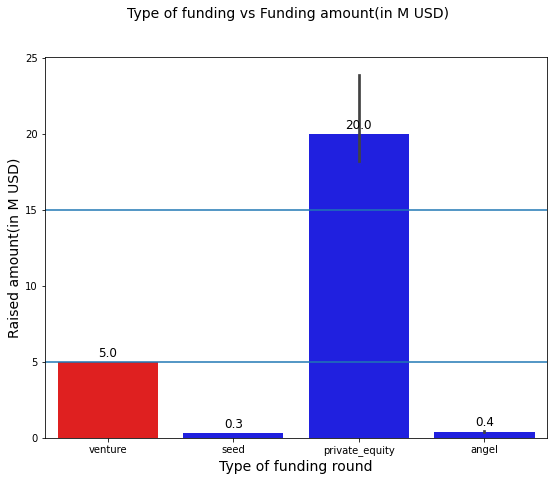

In [118]:
## Drawing the graph
plt.figure(figsize=[9,7])
clrs = ['red' if (x < 15 and x >= 5) else 'blue' for x in four_funding_types.groupby(by = 'funding_round_type').median().sort_index(ascending = False).raised_amount_million_usd.values]
graph = sns.barplot(four_funding_types.funding_round_type, four_funding_types.raised_amount_million_usd,estimator =np. median, palette = clrs)
for p in graph.patches:
            graph.annotate(format(p.get_height(), '.1f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', size=12,
                           xytext = (0, 9), 
                           textcoords = 'offset points')
plt.xlabel('Type of funding round', size = 14)
plt.ylabel('Raised amount(in M USD)', size = 14)
plt.suptitle('Type of funding vs Funding amount(in M USD)', fontsize = 14)
graph.axhline(5)
graph.axhline(15)
plt.savefig('Plot_1.png')
plt.show()

#### As highlighted in the plot, the private equity had the highest investment, but the venture value 5 lies in the expected range 5-15 milllion USD, as marked by lines

#### 2. A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.                 

#### We have a dataframe named top9 already

In [119]:
## Taking a look at top9
top9

,raised_amount_million_usd
country_code,
USA,420068.029342
CHN,39338.918773
GBR,20072.813004
IND,14261.508718
CAN,9482.217668
FRA,7226.851352
ISR,6854.350477
DEU,6306.921981
JPN,3167.647127


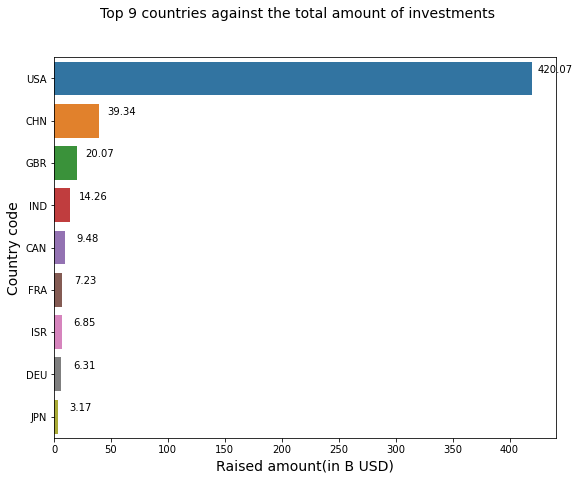

In [120]:
## Drawing the plot
plt.figure(figsize=[9,7])
ax = sns.barplot(top9.raised_amount_million_usd/1000, top9.index)
for p in ax.patches:
        #print(p)
        #print(top9.raised_amount_million_usd.apply(lambda x: "{:,}".format(x)))
        ax.annotate(format(p.get_width(), '.2f'), 
                   (p.get_width()+20,p.get_y() + p.get_height() / 2.), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.suptitle('Top 9 countries against the total amount of investments', fontsize = 14)
plt.xlabel('Raised amount(in B USD)', size = 14)
plt.ylabel('Country code', size = 14)
plt.savefig('Plot_2.png')
plt.show()

#### Looking at the plot, the top 3 countries are clearly visible, as the top 3 bars, except CHN which is not an English speaking country

#### 3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

#### We already have three datasets D1, D2 and D3 for making data to plot these graphs

In [121]:
# Checking the top records for D1
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,permalink,name,category_list,status,country_code,raised_amount_million_usd,main_sector
3,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,8900000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,8.900000,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,5000000.0,/organization/1-mainstream,1 Mainstream,Apps,acquired,USA,5.000000,"News, Search and Messaging"
17,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,11999347.0,/organization/128-technology,128 Technology,Service Providers,operating,USA,11.999347,Others
20,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,15000000.0,/organization/1366-technologies,1366 Technologies,Manufacturing,operating,USA,15.000000,Manufacturing
21,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,5000000.0,/organization/1366-technologies,1366 Technologies,Manufacturing,operating,USA,5.000000,Manufacturing


#### We will create new dataframes to draw the plots

In [122]:
# Dataframe for plot purpose
# USA
D1_plt = pd.pivot_table(D1, values = 'raised_amount_million_usd', index = 'main_sector', aggfunc = ['count','sum']).sort_values(by=[('count', 'raised_amount_million_usd')], ascending = False)

In [123]:
# Dataframe for plot purpose
# GBR
D2_plt = pd.pivot_table(D2, values = 'raised_amount_million_usd', index = 'main_sector', aggfunc = ['count','sum']).sort_values(by=[('count', 'raised_amount_million_usd')], ascending = False)

In [124]:
# Dataframe for plot purpose
# IND
D3_plt = pd.pivot_table(D3, values = 'raised_amount_million_usd', index = 'main_sector', aggfunc = ['count','sum']).sort_values(by=[('count', 'raised_amount_million_usd')], ascending = False)

#### Let's take a look at any one of the dataframe

In [125]:
## Observing the data for plot
D1_plt

,count,sum
,raised_amount_million_usd,raised_amount_million_usd
main_sector,,
Others,2950,26321.007002
"Social, Finance, Analytics, Advertising",2714,23807.376964
Cleantech / Semiconductors,2350,21633.430822
"News, Search and Messaging",1583,13971.567428
Health,909,8211.859357
Manufacturing,799,7258.553378
Entertainment,591,5099.197982
Automotive & Sports,167,1454.104361


#### It clearly shows the investment count , sum of investment for all the sectors

#### Before creating graph, we will create a function, that we will use in our graphs

In [126]:
## Creating a function to make graphs according to certain paramaters
def set_graph(data, xlab, ylab, nr, nc, ind, country, orient = 'v'):
    #print(ind)
    plt.subplot(nr,nc,ind)
    if orient == 'v':
        clrs = ['blue' if (x < data[('count', 'raised_amount_million_usd')].nlargest(2).values[1]) else 'red' for x in data[('count', 'raised_amount_million_usd')].values]
        ax = sns.barplot(data.index,data[('count', 'raised_amount_million_usd')], palette = clrs)
        for p in ax.patches:
            ax.annotate(int(p.get_height()), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', size=12,
                           xytext = (0, 9), 
                           textcoords = 'offset points')
            ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
            if country == 'USA':
                ax.text(p.get_width()*5,p.get_width()*2400, country, horizontalalignment='left', size='large', color='black')
            elif country == 'IND':
                ax.text(p.get_width()*5,p.get_width()*90, country, horizontalalignment='left', size='large', color='black')
            elif country == 'GBR':
                ax.text(p.get_width()*5,p.get_width()*120, country, horizontalalignment='left', size='large', color='black')
            plt.xlabel(xlab, size = 14)
            plt.ylabel(ylab, size = 14)
    elif orient == 'h':
        ax = sns.barplot(data[('count', 'raised_amount_million_usd')],data.index)
        for p in ax.patches:
            ax.annotate(format(p.get_width(), '.1f'), 
                       (p.get_width()+5,p.get_y() + p.get_height() / 2.), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
            ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
            plt.xlabel(xlab, size = 14)
            plt.ylabel(ylab, size = 14)

#### Let's create the graph showing the 3 countries with top 3 sectors

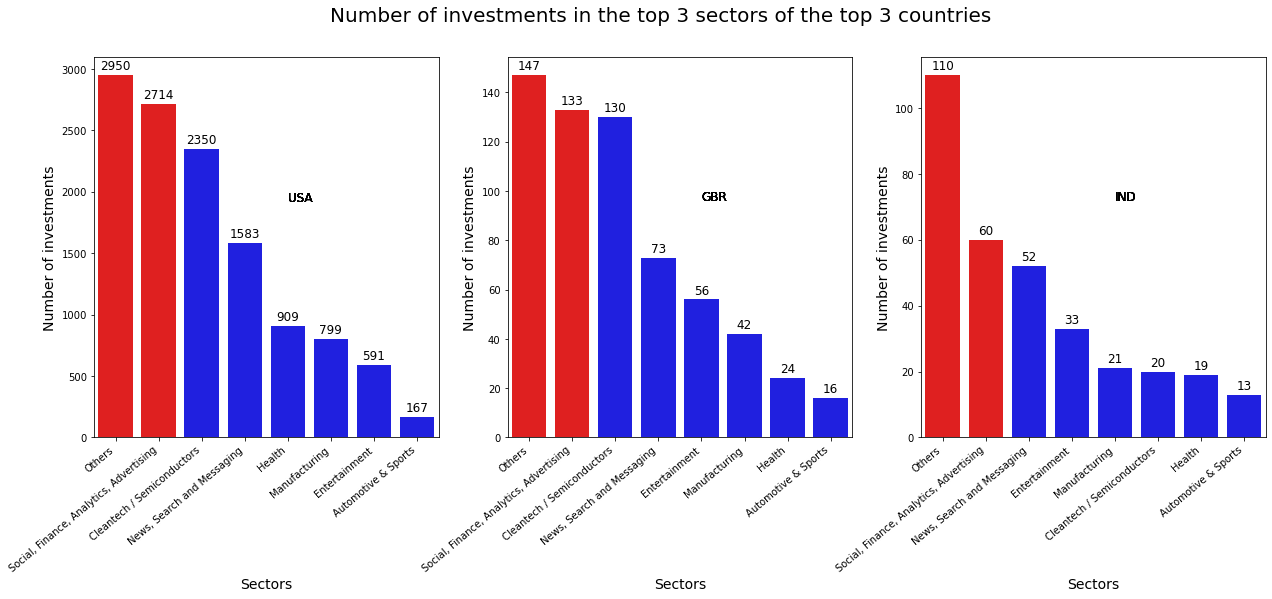

In [127]:
## Drawing the grap fo rtop 3 countries highlighting the top 2 sectors in each
plt.figure(figsize=[21,7])
set_graph(D1_plt,'Sectors','Number of investments',1,3,1,'USA')
set_graph(D2_plt,'Sectors','Number of investments',1,3,2,'GBR')
set_graph(D3_plt,'Sectors','Number of investments',1,3,3,'IND')
plt.suptitle('Number of investments in the top 3 sectors of the top 3 countries', fontsize = 20)
plt.savefig('Plot_3.png', bbox_inches = "tight")
plt.show()

#### The above graph has highlighted the top two sectors in each country